# Description

## imports

In [99]:
# for plotting
import matplotlib.pyplot as plt
# import scikit learn databases
from sklearn import datasets
# for exploratory data analysis vis
import seaborn as sns
# for table/data-frame manipulations
import pandas as pd


## declare some global variables

In [233]:
# how much detail we want to print
verbose = 1
plot_universal = False
location = 'california'

## Get Data: 1990s California Housing
### Predicting a house's value based on its attributes

In [106]:
# load the dataset
if location == 'california':
    dataset = datasets.fetch_california_housing()
    feedback = location.title() + ' Prediction Target: ' + dataset.target_names[0]

elif location == 'boston':
    dataset = datasets.load_boston()
    feedback = location.title() + 'Prediction Target: Median_Val'
if verbose:
    print(feedback)
    print('='*len(feedback), '\n')
    print(dataset.DESCR)

California Prediction Target: MedHouseVal

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geog

In [112]:
# put data into a df
df = pd.DataFrame(
    data = dataset.data, columns=dataset.feature_names
)
# add the target variable for exploratory data analysis
if location == 'california':
    # measured in $100,000
    df[dataset.target_names[0]] = dataset.target*100000
    # adjust the Medin Income which is measured in $10,000
    df['MedInc'] = df['MedInc']*10000
elif location == 'boston':
    df['Median_Val'] = dataset.target
# show first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,83252.0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,83014.0,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,72574.0,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,56431.0,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,38462.0,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [113]:
# check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [114]:
# quick 5 stat summary
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,38706.710029,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,18998.217179,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,4999.000000,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,25634.000000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,35348.000000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,47432.500000,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,150001.000000,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


The traditional test/train split is important because during "training" the model fits to the training data

## To see why Cross Validation is important, let's begin with an extremely simplified version of the problem
- And we'll show how the model fits its parameters to the training data
- how we use validation data to score it
- and how we use test data to estimate how well the model will generalize

### Linear Regression between one feature and the target
- This is the actual relationship between our input features and our target (prediction) feature
- Let's assume this is a "God's eye" view of all the data in the universe

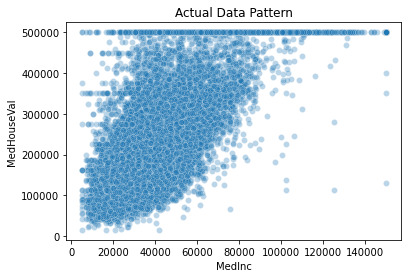

In [255]:
if location == 'california':
    # pick the median income of the house's block
    first_ft = 'MedInc'
    target = 'MedHouseVal'
fig = sns.scatterplot(
    x = df[first_ft],
    y = df[target],
    alpha = .3
)
plt.title('Actual Data Pattern')

plt.show()

### Incrementally add data to see how the linear model adapts
- Let's assume that we have limitations on how much data we can train a model on
    - maybe we don't have a lot of data
    - or maybe we have a lot but it's costly to compute on all of it

## If we don't use cross validation, we split our data in the traditional 70/30 (train/test) split and score our model's performance

In [159]:
# generate n fibonnaci steps 
n = 4
# init the sequence
fib = [1,1]
for i in range(n):
    fib.append(sum(fib[-2:]))
fib = fib[2:]
fib

[2, 3, 5, 8]

In [160]:
#plt.plot(fib, 'ro--')

## Minimum viable example of 60/20/20 3/1/1

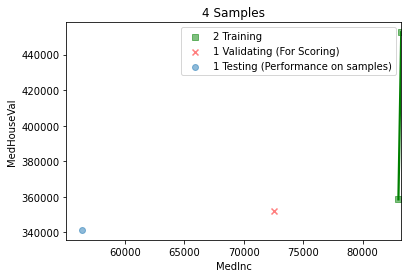

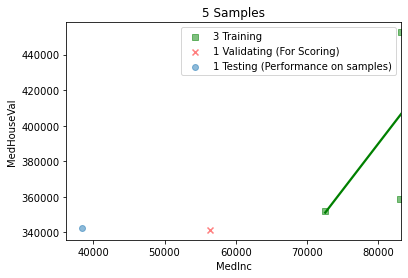

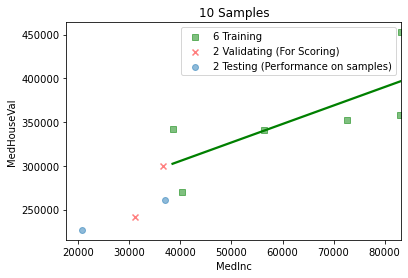

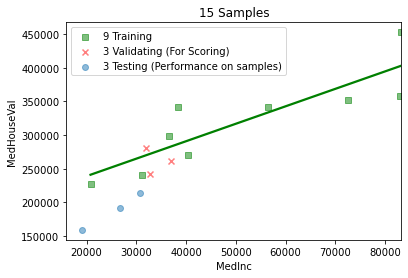

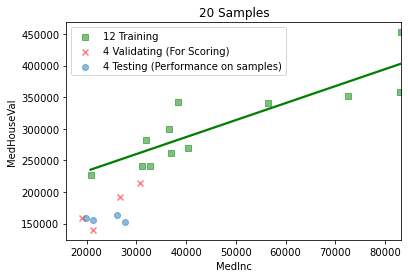

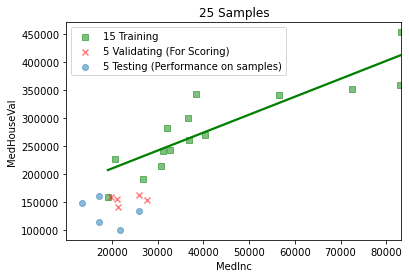

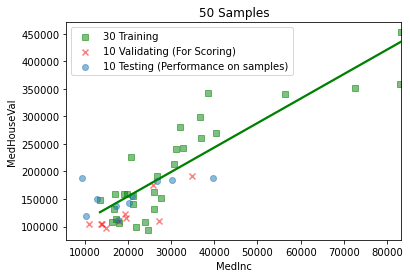

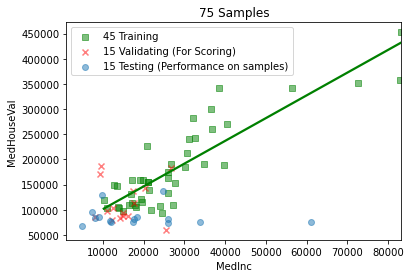

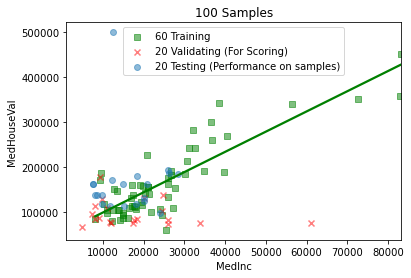

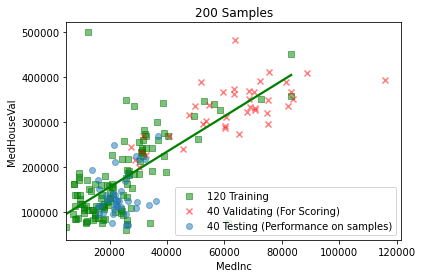

In [247]:
steps = [
    # the minimum viable split
    4,
    # increments of 5 (splittable in 60/20/20)
    5,10,15,20,25,
    # increments of 25
    50, 75, 100, 200
]

for m_samples in steps:
    # define the count of each data split
    m_train = int(m_samples*.60)
    m_validate = max([int(m_samples*.20), 1])
    m_test = max([int(m_samples*.20), 1])
    
    # plot the training data and model
    ax = sns.regplot(
        x = df[first_ft][:m_train],
        y = df[target][:m_train],
        scatter = True,
        color = 'green',
        marker = 's',
        line_kws = {'linestyle':'-'},
        scatter_kws = {'alpha': 0.5},
        # fit a regression line
        fit_reg = True,
        # order of the polynomial fit
        order = 1,
        # don't calculate the confidence interval or bootstrap samples
        ci = 0,
        n_boot = 10,
        label = f'{m_train} Training',
    )
    
    if plot_universal:
        # plot all the uninverse's data
        ax.scatter(
            x = df[first_ft][m_train + m_validate + m_test:],
            y = df[target][m_train + m_validate + m_test:],
            label = f'{m_validate} Universal Data',
            # set transparency
            alpha = .2,
            #c = 'cyan',
            #facecolors = 'blue',
            edgecolors= 'white',
        )

    # plot the validation data
    ax.scatter(
        x = df[first_ft][m_train:m_train + m_validate],
        y = df[target][m_train:m_train + m_validate],
        color = 'red',
        marker = 'x',
        # opacity
        alpha = .5,
        label = f'{m_validate} Validating (For Scoring)',
    )

    # plot the testing data
    ax.scatter(
        x = df[first_ft][m_train + m_validate:m_train + m_validate + m_test],
        y = df[target][m_train + m_validate:m_train + m_validate + m_test],
        #opacity
        alpha = .5,
        label = f'{m_validate} Testing (Performance on samples)',
    )
    
    
    
    # call the legend
    ax.legend()
    # add title 
    plt.title(f'{m_samples} Samples')
    plt.show()

## Ok, Now let's do it with actual sklearn

# Tinkering

## subplots

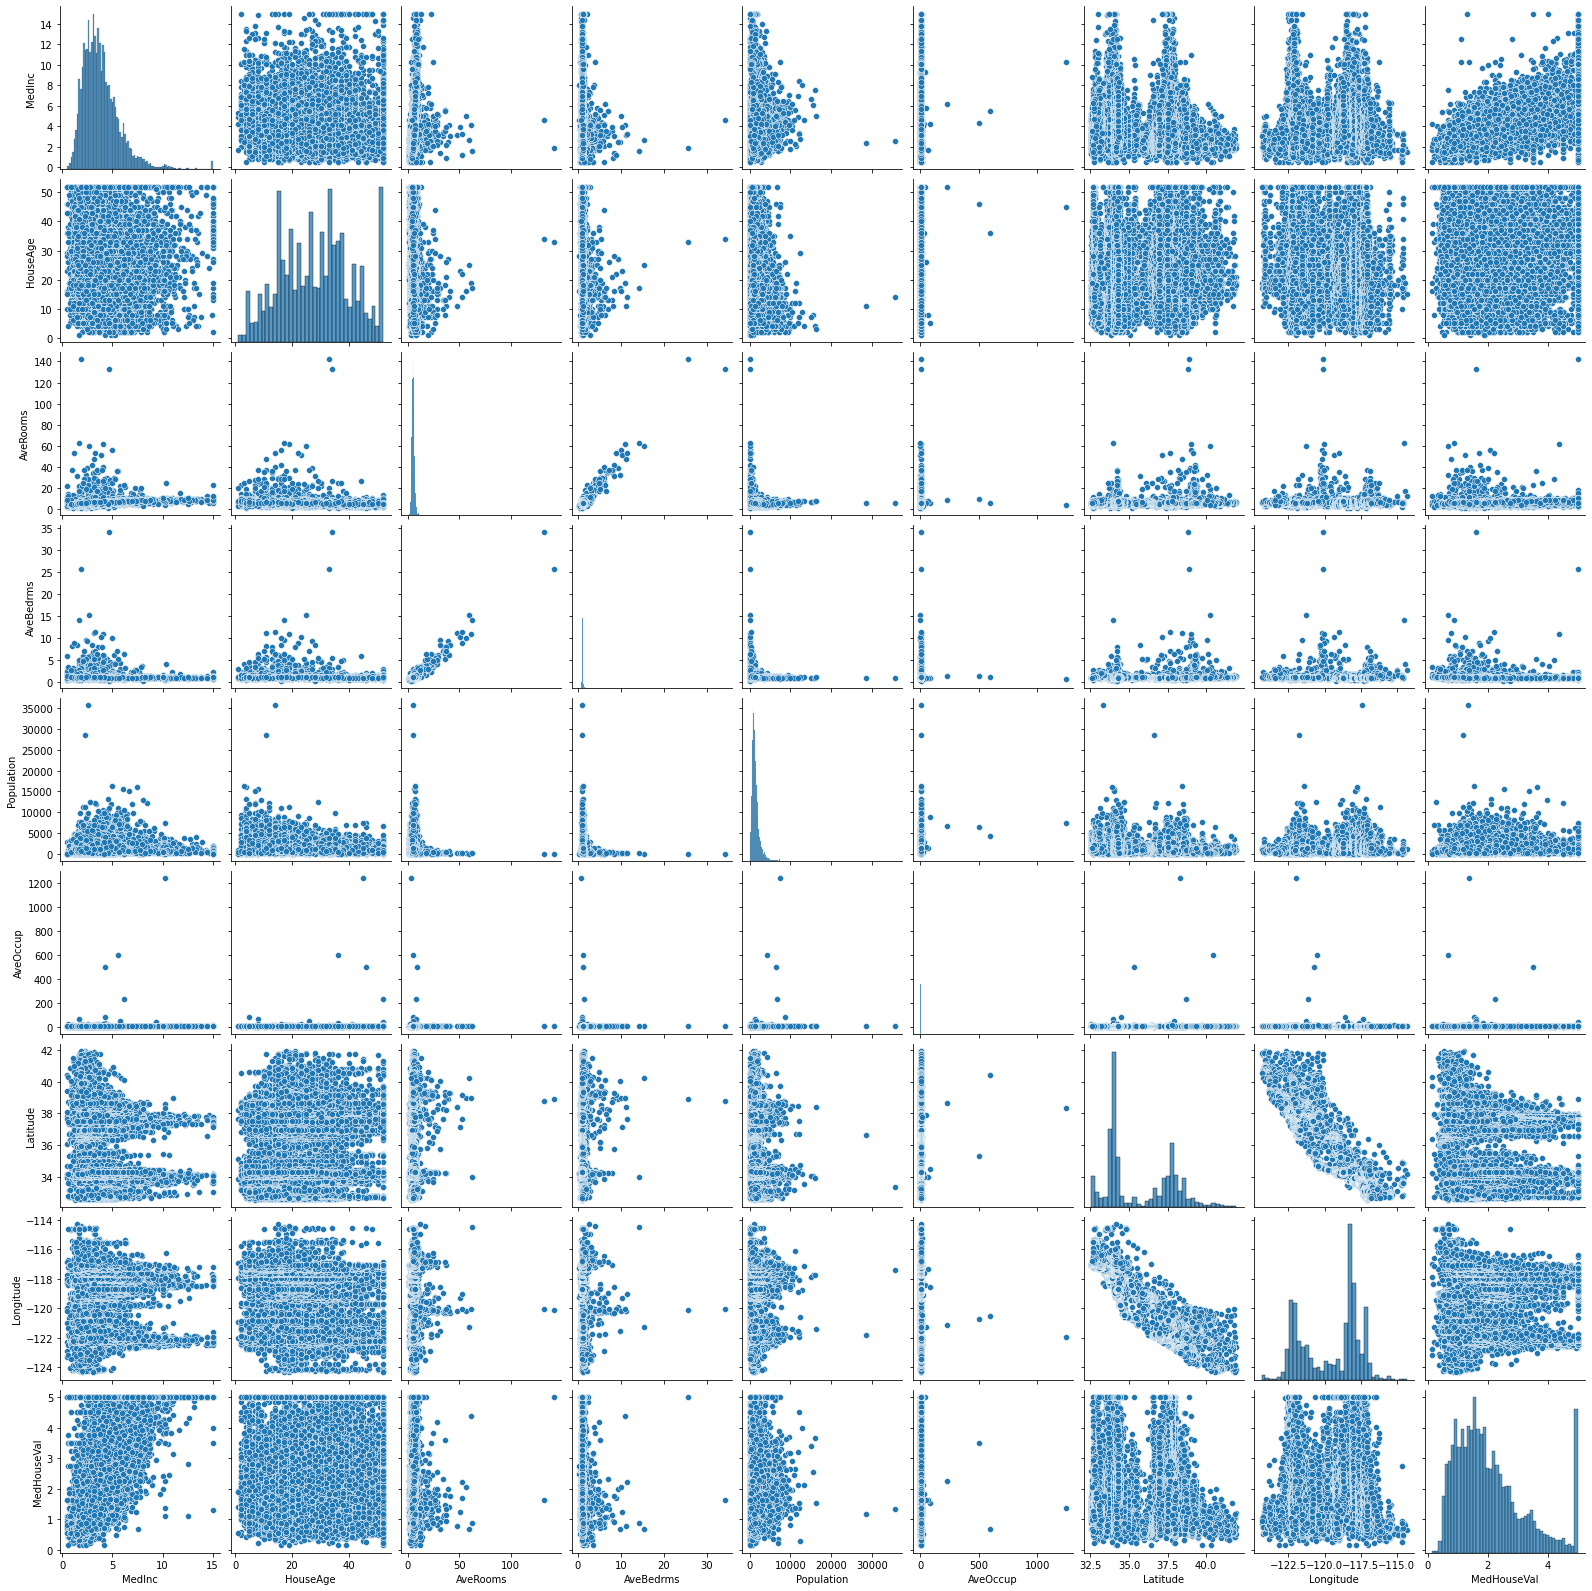

In [64]:
sns.pairplot(
    data = df,
    # plot scatters
    kind = 'scatter'
)

<AxesSubplot:>

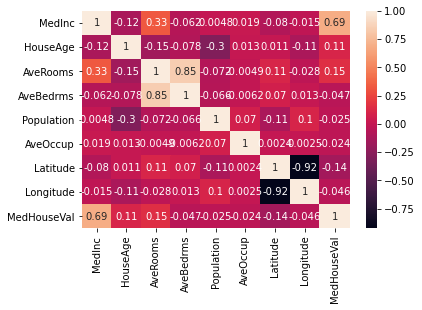

In [65]:
sns.heatmap(
    df.corr(),
    annot = True
)

# Tinkering